In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import Point 

# 1. Map of Counties with data vs no data

In [5]:
counties_gdf = gpd.read_file("../maps/cb_2021_us_county_20m")
download_df = pd.read_csv('results_2025-04-04.csv')

In [6]:
# filter for CONUS
conus_df = download_df[~download_df['state'].isin(['Alaska', "Hawaii", "Puerto Rico"])]

In [7]:
conus_df['name_abbrev'] = conus_df['name_full'].apply(lambda x: x.split(',')[0].split('County')[0].strip())
merge_df = counties_gdf.merge(conus_df, left_on=['NAME', 'STATE_NAME'], right_on=['name_abbrev', 'state'], how='right', indicator=True)
merge_df[merge_df['_merge'] != 'both']

/tmp/ipykernel_9066/3261776918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conus_df['name_abbrev'] = conus_df['name_full'].apply(lambda x: x.split(',')[0].split('County')[0].strip())


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,AWATER,geometry,state,name_full,name_abbrev,downloaded,file_path,size,date,_merge
279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Connecticut,"Capitol Planning Region, Connecticut",Capitol Planning Region,Success,../data/Connecticut/Capitol_Planning_Region.gpkg,2.3 MB,2025-04-04,right_only
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Connecticut,"Greater Bridgeport Planning Region, Connecticut",Greater Bridgeport Planning Region,Success,../data/Connecticut/Greater_Bridgeport_Plannin...,614.4 KB,2025-04-04,right_only
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Connecticut,Lower Connecticut River Valley Planning Region...,Lower Connecticut River Valley Planning Region,Success,../data/Connecticut/Lower_Connecticut_River_Va...,581.632 KB,2025-04-04,right_only
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Connecticut,"Naugatuck Valley Planning Region, Connecticut",Naugatuck Valley Planning Region,Success,../data/Connecticut/Naugatuck_Valley_Planning_...,708.608 KB,2025-04-04,right_only
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Connecticut,"Northeastern Connecticut Planning Region, Conn...",Northeastern Connecticut Planning Region,Success,../data/Connecticut/Northeastern_Connecticut_P...,417.792 KB,2025-04-04,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Virginia,"Suffolk city, Virginia",Suffolk city,Fail,NaN,NaN,2025-04-04,right_only
2922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Virginia,"Virginia Beach city, Virginia",Virginia Beach city,Fail,NaN,NaN,2025-04-04,right_only
2923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Virginia,"Waynesboro city, Virginia",Waynesboro city,Fail,NaN,NaN,2025-04-04,right_only
2924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,Virginia,"Williamsburg city, Virginia",Williamsburg city,Fail,NaN,NaN,2025-04-04,right_only


new binary column for data availability

In [16]:
merge_df['data_availability'] = merge_df['_merge'].apply(lambda x: 'Yes' if x =='both' else 'No')
merge_df['data_availability'].value_counts() 

data_availability
Yes    3002
No      113
Name: count, dtype: int64

In [49]:
conus_df['downloaded'].value_counts()

downloaded
Success    2719
Fail        390
Name: count, dtype: int64

In [51]:
2719/(2719+390)

0.8745577356063042

<Axes: >

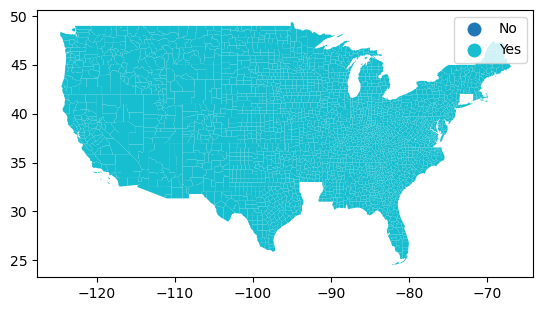

In [17]:
merge_df.plot(column='data_availability', categorical=True, legend=True)

## How many polygons? And, of what type?

In [1]:
import geopandas as gpd
from pathlib import Path
import fiona
import pandas as pd

extract shape counts for a single county

In [5]:
path = Path('Alabama/Autauga.gpkg')

layers = ['parks', 'pitches', 'sports_centres', 'schools']

result = pd.DataFrame(columns = ['county'] + layers)

# to store data
data = {}
data['county'] = 'Autauga'

for layer in layers:
    try:
        gdf = gpd.read_file(path, layer=layer)
        data[layer] = len(gdf)
    except:         # in case layer doesn't exist
        data[layer] = 0

# add to result
result.loc[len(result)] = data

print(result)

    county  parks  pitches  sports_centres  schools
0  Autauga     21       51               2       63


#### Modify Code to execute on all counties

In [ ]:
# set data path
data_path = Path('/home/vince/mnt/hellgate/osm_project/data')

# setup output file
layers = ['parks', 'pitches', 'sports_centres', 'schools']
result = pd.DataFrame(columns = ['state', 'county'] + layers)

# list all the state folders
states = [f.name for f in data_path.iterdir() if f.is_dir()]

for state in states[:1]:
    state_path = data_path / state

    files = [f for f in state_path.iterdir() if f.is_file()] # full file paths

    for county_gpk_path in files[:1]:
        county_name = county_gpk_path.name
        
        # initial county data record
        county_data = {'state':state, 'county':county_name}
        
        for layer in layers:
            try:
                gdf = gpd.read_file(county_gpk_path, layer=layer)
                county_data[layer] = len(gdf)
            except:         # in case layer doesn't exist
                county_data[layer] = 0

        # add county data to result
        result.loc[len(result)] = county_data

print(result)

: 

: 